In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

In [50]:
# Import weather data from .txt file, skip first two rows
df = pd.read_csv("23_03_data.txt", header = None, skiprows = 2, parse_dates = [[0, 1]], 
                     dayfirst = True, sep = "\t", na_values = "---")
df.head()

,0_1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,2023-03-01 00:30:00,6.0,6.2,5.9,77.0,2.3,2.0,E,1.0,6.0,...,21.5,38,6.6,20.1,7.52,1.2182,701,1,100.0,30
1,2023-03-01 01:00:00,6.1,6.1,6.0,76.0,2.1,3.0,E,1.5,5.0,...,21.7,38,6.8,20.4,7.51,1.2170,700,1,100.0,30
2,2023-03-01 01:30:00,5.4,6.1,5.4,77.0,1.7,3.0,E,1.5,7.0,...,21.9,38,6.9,20.7,7.49,1.2157,702,1,100.0,30
3,2023-03-01 02:00:00,4.7,5.4,4.7,79.0,1.4,3.0,E,1.5,7.0,...,22.2,38,7.2,21.1,7.47,1.2143,699,1,100.0,30
4,2023-03-01 02:30:00,4.6,4.7,4.5,80.0,1.4,3.0,E,1.5,7.0,...,22.4,38,7.4,21.4,7.45,1.2127,703,1,100.0,30


In [51]:
# Replace headers
header = ['DateTime', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.', 'Wind Speed',
 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index',
 'Bar', 'Rain', 'Rain Rate', 'Heat D-D', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew',
 'In Heat', 'In EMC', 'In Air Density', 'Wind Samp', 'Wind Tx', 'ISS Recept', 'Arc. Int.']

df.columns = header
df.head()
# df.dtypes
# Other values
# Solar Rad.', 'Solar Energy', 'Hi Solar Rad.', 'UV Index', 'UV Dose', 'Hi UV', 

,DateTime,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,2023-03-01 00:30:00,6.0,6.2,5.9,77.0,2.3,2.0,E,1.0,6.0,...,21.5,38,6.6,20.1,7.52,1.2182,701,1,100.0,30
1,2023-03-01 01:00:00,6.1,6.1,6.0,76.0,2.1,3.0,E,1.5,5.0,...,21.7,38,6.8,20.4,7.51,1.2170,700,1,100.0,30
2,2023-03-01 01:30:00,5.4,6.1,5.4,77.0,1.7,3.0,E,1.5,7.0,...,21.9,38,6.9,20.7,7.49,1.2157,702,1,100.0,30
3,2023-03-01 02:00:00,4.7,5.4,4.7,79.0,1.4,3.0,E,1.5,7.0,...,22.2,38,7.2,21.1,7.47,1.2143,699,1,100.0,30
4,2023-03-01 02:30:00,4.6,4.7,4.5,80.0,1.4,3.0,E,1.5,7.0,...,22.4,38,7.4,21.4,7.45,1.2127,703,1,100.0,30


In [52]:
# Remove dodgy readings

def filter_outliers(df, col):
    # For each of your dataframe column calc upper and lower quantiles:
    q_low = df[col].quantile(0.001)
    q_hi  = df[col].quantile(0.999)

    # Filter data with AND statement
    return df[col][(df[col] < q_hi) & (df[col] > q_low)]

df["Temp Out"] = filter_outliers(df, 'Temp Out')
df["Out Hum"] = filter_outliers(df, 'Out Hum')
df["Bar"] = filter_outliers(df, 'Bar')

In [53]:
# Function to create list of max, min and mean   
def summary_new(column):
    mx = df[column].max()
    mn = df[column].min()
    av = round(df[column].mean(), 1)
    return [
        ['Max', mx],
        ['Min', mn],
        ['Average', av]
    ]

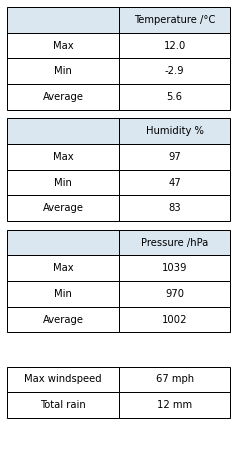

In [54]:
# Create variables to sort summary values of temperature, humidity and pressure
temps = summary_new('Temp Out')
humds = summary_new('Out Hum')
press = summary_new('Bar')

# Convert pressure and humidity figures to whole numbers
for h in humds:
    h[1] = int(h[1])
for p in press:
    p[1] = int(p[1])
    

# Get over summary figures
max_wind = str(int(df["Hi Speed"].max())) + " mph"
total_rain = str(int(df["Rain"].sum())) + " mm"

summary = [
            ["Max windspeed", max_wind],
            ["Total rain", total_rain]
            ]

# Define figure and axes
fig_table, (ax_table1, ax_table2, ax_table3, ax_table4) = plt.subplots(4)

# Create headers for table
temp_headers = ['','Temperature /°C']
humd_headers = ['', 'Humidity %']
press_headers = ['', 'Pressure /hPa']

# Create colourmap for table
ccolors = plt.cm.BuPu(np.full(len(temp_headers), 0.15))

# Create four table for values
table1 = ax_table1.table(cellText = temps, colLabels = temp_headers, colColours = ccolors, 
                            loc = 'center', cellLoc = 'center')
ax_table1.axis('off')

table2 = ax_table2.table(cellText = humds, colLabels = humd_headers, colColours = ccolors,
                            loc = 'center', cellLoc = 'center')
ax_table2.axis('off')

table3 = ax_table3.table(cellText = press, colLabels = press_headers, colColours = ccolors,
                            loc = 'center', cellLoc = 'center')
ax_table3.axis('off')

table4 = ax_table4.table(cellText = summary, loc = 'center', cellLoc = 'center')
ax_table4.axis('off')

# Other useful commands
# ax_table3.set_title("Pressure /hPa")
# table1.auto_set_column_width(col=[0,1])

# Turn off auto font size and set font size to 10
table1.auto_set_font_size(False)
table2.auto_set_font_size(False)
table3.auto_set_font_size(False)
table4.auto_set_font_size(False)
table1.set_fontsize(10)
table2.set_fontsize(10)
table3.set_fontsize(10)
table4.set_fontsize(10)

# Set height and width
fig_table.set_figheight(8)
fig_table.set_figwidth(4)

# Tidy up layout

#fig_table.tight_layout()
plt.subplots_adjust(hspace = 0.1)

# Plot graph
plt.show()

# Save table as .png
fig_table.set_facecolor('white')
fig_table.savefig(FileMonthYear + "_table" + '.png', bbox_inches = 'tight', dpi = 600)

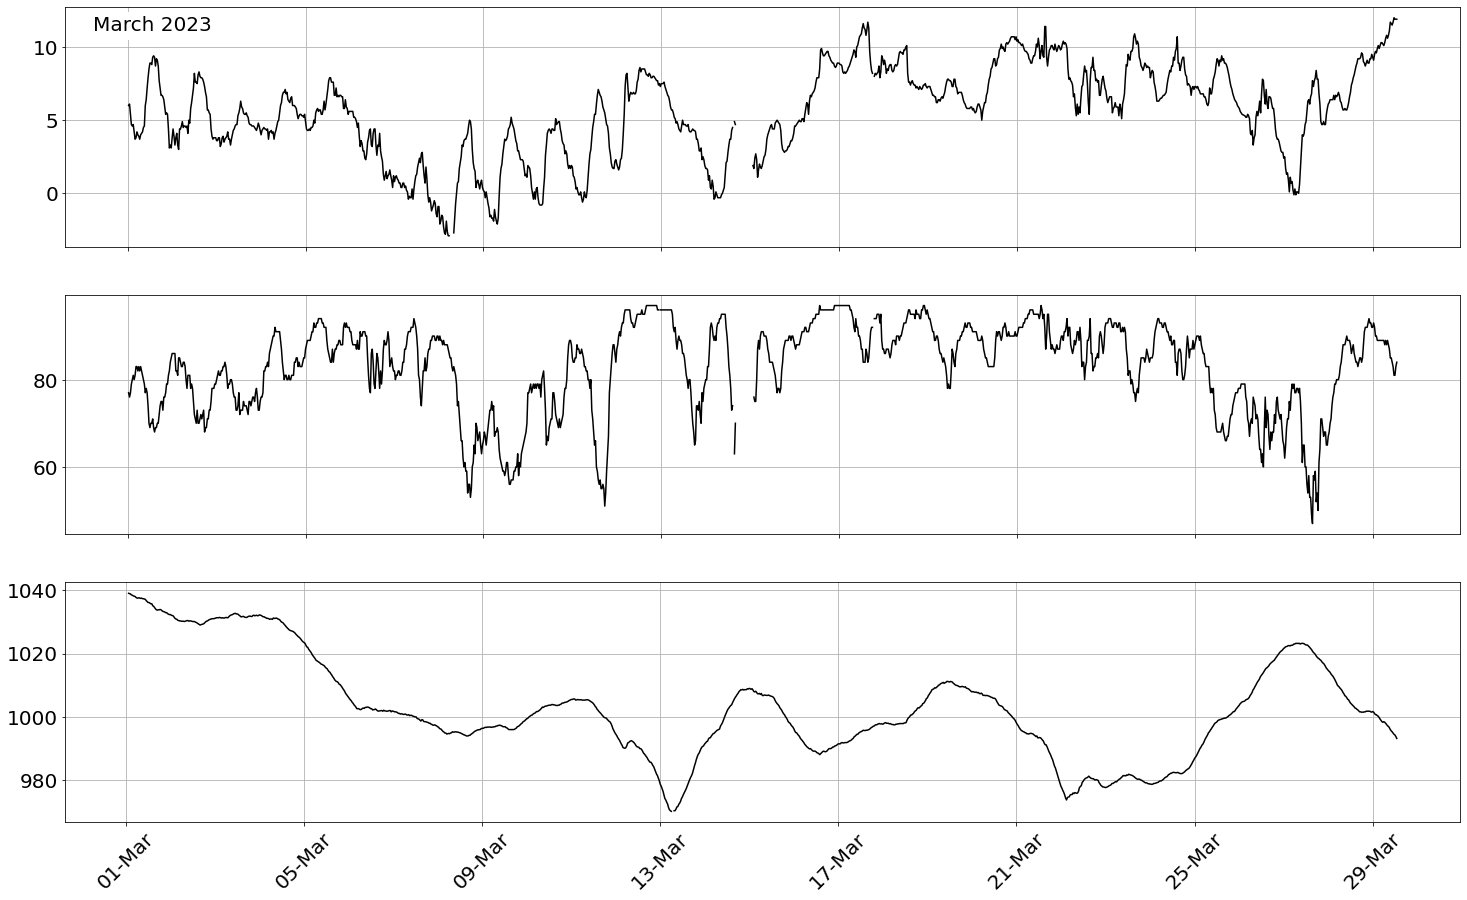

In [55]:
# Plot graphs

dates = df.loc[: , "DateTime"]
temp = df.loc[: , "Temp Out"]
humdity = df.loc[: , "Out Hum"]
pressure = df.loc[: , "Bar"]

fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(dates, temp, color = "black")
ax1.tick_params(labelbottom = False)
ax1.tick_params(axis ='y', labelsize = 20)
ax1.grid()

ax2.plot(dates, humdity, color = "black")
ax2.tick_params(labelbottom = False)
ax2.tick_params(axis = 'y', labelsize = 20)
ax2.grid()

ax3.plot(dates, pressure, color = "black")
ax3.tick_params(axis = 'y', labelsize = 20)
ax3.tick_params(axis = 'x', labelsize = 20, labelrotation = 45)
ax3.grid()

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

fig.set_figheight(15)
fig.set_figwidth(25)

ax1.annotate(MonthYear, xy = (0.02,0.9), xycoords='axes fraction', fontsize=20, backgroundcolor="white")

fig.set_facecolor('white')
fig.savefig(FileMonthYear + "_summary" + '.png', bbox_inches='tight', dpi=600)

# New graphs

In [8]:
# Plot graphs with rain

# dates = df.loc[: , "DateTime"]
# temp = df.loc[: , "Temp Out"]
# humdity = df.loc[: , "Out Hum"]
# rain = df.loc[: , "Rain Rate"]
# pressure = df.loc[: , "Bar"]

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

# ax1.plot(dates, temp, color = "black")
# ax1.tick_params(labelbottom = False)
# ax1.tick_params(axis ='y', labelsize = 20)
# ax1.grid()

# ax2.plot(dates, humdity, color = "black")
# ax2.tick_params(labelbottom = False)
# ax2.tick_params(axis = 'y', labelsize = 20)
# ax2.grid()

# ax3.plot(dates, rain, color = "black")
# ax3.tick_params(labelbottom = False)
# ax3.tick_params(axis = 'y', labelsize = 20)
# ax3.grid()

# ax4.plot(dates, pressure, color = "black")
# ax4.tick_params(axis = 'y', labelsize = 20)
# ax4.tick_params(axis = 'x', labelsize = 20, labelrotation = 45)
# ax4.grid()

# ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

# fig.set_figheight(15)
# fig.set_figwidth(25)

# ax1.annotate(MonthYear, xy = (0.02,0.85), xycoords='axes fraction', fontsize=20, backgroundcolor="white")

# fig.set_facecolor('white')
# fig.savefig(FileMonthYear + "_summary_with_rain" + '.png', bbox_inches='tight', dpi=600)

In [9]:
# Histogram of Temperatures

# df.hist(column='Temp Out')
# plt.title("Temperature Histogram - " + MonthYear, fontsize=12)
# plt.xlabel("Temperature /°C", fontsize=10)
# plt.savefig(FileMonthYear + '_temperature_histogram.png', facecolor='w', bbox_inches='tight', dpi=600)

In [10]:
# Histogram of Average windspeeds

# df.hist(column = 'Wind Speed')
# plt.title("Average Windspeed Histogram - " + MonthYear, fontsize=12)
# plt.xlabel("Windspeed /mph", fontsize=10)
# plt.savefig(FileMonthYear + '_windspeed_histogram.png', facecolor='w', bbox_inches='tight', dpi=600)